In [64]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds1.1.csv', na_values='?',    
         header=None,  names = headers) 
#data = data.reset_index(drop=True)
#print(type(data))

data = data.iloc[1:,:]

#print(type(data))

d_cut = {"Ideal":5,"Premium":4,"Very Good":3,"Good":2,"Fair":1}
d_color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
d_clarity = {"IF":8,"VVS1":7,"VVS2":6,"VS1":5,"VS2":4,"SI1":3,"SI2":2,"I1":4}
 



data["cut"] = data["cut"].map(d_cut)
data["color"] = data["color"].map(d_color)
data["clarity"] = data["clarity"].map(d_clarity)

X = data[['carat','cut','color','clarity','depth','table','x']]
Y = data[['price']]

sc = StandardScaler()
X = sc.fit_transform(X)


Y = Y.values.astype(np.double)


[[-1.63031974  1.07924945  1.92493008  2.92754217  0.26539485 -0.8853912
  -1.1868065 ]
 [ 1.06177623  0.13406825 -0.49302218 -1.00372874 -1.27684244  0.50756867
   0.93809444]
 [ 0.12851629  0.13406825 -1.09751025  0.30669489 -0.31294413  0.97188862
   0.23280817]
 [-0.4099029   1.07924945  0.11146588  0.96190671  0.39391463 -1.34971115
  -0.1288771 ]
 [-0.42785021 -0.81111294  0.71595395  0.30669489 -0.50572379  0.97188862
  -0.19217202]
 [-0.42785021 -1.75629413  0.71595395  0.30669489  0.39391463 -0.8853912
  -0.29163546]
 [-1.00216402 -0.81111294  0.71595395  2.92754217 -2.17648086  0.97188862
  -0.49056236]
 [ 0.11056898 -1.75629413 -0.49302218 -0.34851692  1.10077339  0.50756867
   0.08813406]
 [-0.53553405  1.07924945  0.11146588  1.61711853  0.13687508 -0.8853912
  -0.24642481]
 [-0.3919556   0.13406825  0.11146588  0.96190671 -1.40536221  0.97188862
  -0.03845578]]
<class 'numpy.ndarray'>


In [65]:
import numpy
#print(type(data))



# print(X)
# X_final = X.values.astype(np.double)
# Y_final = Y.values.astype(np.double)
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J


def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
    #print(iteration)
    # Hypothesis Values
        h = X.dot(B)
        
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        gl,gw = gradient.shape
        # Changing Values of B using Gradient
        temp = alpha * gradient
        B = B - temp
        
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history



m = 300
X_train = X[:m]
Y_train = Y[:m]



X_train = np.c_[np.ones(len(X_train),dtype='int32'),X_train]


# Initial Coefficients
B = [[0],[0],[0],[0],[0],[0],[0],[0]]
alpha = 0.001
iter_ = 500000


newB, cost_history = batch_gradient_descent(X_train, Y_train, B, alpha, iter_)

print("final weights are ",newB)

final weights are  [[ 1.66747484e+04]
 [ 3.04959806e+03]
 [ 2.36272517e+02]
 [ 1.20155286e+03]
 [ 1.03242528e+03]
 [-1.41433019e+02]
 [ 3.53033440e+00]
 [ 1.89488106e+03]]


In [66]:
error = 0
for i in range (0,300):
    error  =error +  abs(X_train[i].dot(newB)-Y_train[i])

print(error/300)
    

[1286.75082531]


<AxesSubplot:>

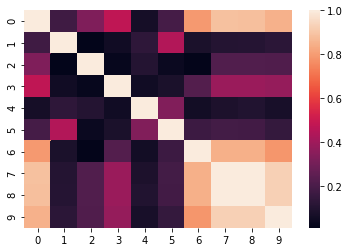

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


np.random.seed(123)
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data_c = pd.read_csv('diamonds1.1.csv', na_values='?',    
         header=None,  names = headers) 

data_c = data_c.iloc[1:,:]

d_cut = {"Ideal":5,"Premium":4,"Very Good":3,"Good":2,"Fair":1}
d_color = {"D":7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1}
d_clarity = {"IF":8,"VVS1":7,"VVS2":6,"VS1":5,"VS2":4,"SI1":3,"SI2":2,"I1":4}

data_c["cut"] = data_c["cut"].map(d_cut)
data_c["color"] = data_c["color"].map(d_color)
data_c["clarity"] = data_c["clarity"].map(d_clarity)

n = data_c.values.astype(np.double)
data_final = pd.DataFrame(n)

corr = data_final.corr().abs()
# Select upper triangle of correlation matrix
sns.heatmap(corr)